# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance
import math as math

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance (Cluster_Centroids, Data_points, Distance_type):
    Data_points=np.array(Data_points)
    Cluster_Centroids=np.array(Cluster_Centroids)
    Cluster_Distance = []
    
    if Distance_type == 'Eculedian':       
        i=0
        while i < len(Data_points):
            j=0
            dis=[]
            while j < len(Cluster_Centroids):
                    dis.append(np.linalg.norm(Cluster_Centroids[j]- Data_points[i]))
                    j+=1
            Cluster_Distance.append(dis)        
            i+=1        
        return Cluster_Distance
    if Distance_type == 'Pearson correlation':
        mean_data=[]
        mean_centroids=[]
        mean_square_centroids=[]
        mean_square_data=[]

        i=0
        while i<len(Data_points):

            mean_data.append(Data_points[i]-np.mean(Data_points[i]))
            i+=1
        i=0    
        while i<len(Cluster_Centroids):

            mean_centroids.append(Cluster_Centroids[i]-np.mean(Cluster_Centroids[i]))
            i+=1  
        i=0
        while i< len(Cluster_Centroids):

            mean_square_centroids.append(np.sum(pow(mean_centroids[i],2)))
            i+=1
        i=0
        while i< len(Data_points):

            mean_square_data.append(np.sum(pow(mean_data[i],2)))
            i+=1
        i=0    
        while i < len(Data_points):
            j=0
            dis=[]
            while j < len(Cluster_Centroids):
                    x=np.sum(mean_data[i]*mean_centroids[j])
                    y=np.sqrt(np.sum(mean_square_data[i])*np.sum(mean_square_centroids[j]))
                    dis.append(1-(x/y))
                    j+=1
            Cluster_Distance.append(dis)        
            i+=1        
        return Cluster_Distance


        
        
        
        

In [ ]:
# Data_points=[[3,6,2],[1,5,7],[7,2,1]]
# Cluster_Centroids=[[1,4,6],[8,2,1]]
# GUC_Distance(Cluster_Centroids,Data_points,'Eculedian')
# GUC_Distance(Cluster_Centroids,Data_points,'Pearson correlation')


# > Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [3]:
def GUC_Kmean ( Data_points, Number_of_Clusters,Distance_type):    
    Data_points=np.array(Data_points)
    Cluster_Centroids=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
    diff=1
    stopcondition=0.0000001
    counte=0
    while diff > stopcondition:
        if counte==0:
            x=GUC_Distance(Cluster_Centroids,Data_points,Distance_type)
        else:    
            x=GUC_Distance(Updated_Centroids,Data_points,Distance_type)
        clusters=[]
        i=0
        while i < len(x):
            clusters.append(x[i].index(min(x[i])))
            i+=1   
        minInRows = np.amin(x, axis=1)
        meansquaredis=[]
        clusterdata=[]
        i=0
        while i < len(np.unique(clusters)):
            counter=0
            j=0
            row=[]
            while j < len(minInRows):
                if clusters[j] == i:
                    row.append(Data_points[j])
                    counter=counter+pow(minInRows[j],2)
                j+=1
            clusterdata.append(row)    
            meansquaredis.append(counter)    
            i+=1
        meansqrnew=sum(meansquaredis)    
        i=0
        Updated_Centroids=[]    
        while i < len(np.unique(clusters)):
            Updated_Centroids.append(np.array(clusterdata[i]).mean(axis=0))
            i+=1
        Updated_Centroids=np.array(Updated_Centroids)
        meansqrnew=sum(meansquaredis)
        if counte==0:
            meansqrold=99999999

        diff=meansqrold-meansqrnew
        meansqrold=meansqrnew
        counte=counte+1
    
    return [ Updated_Centroids , meansquaredis, clusters, meansqrnew, meansqrold, counte]  


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters

def display_cluster(X,km,num_clusters,centroids):
    
    color = ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#68228B']  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:       
        for i in range(num_clusters):
            plt.scatter(X[km == i,0],X[km == i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(centroids[i][0],centroids[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

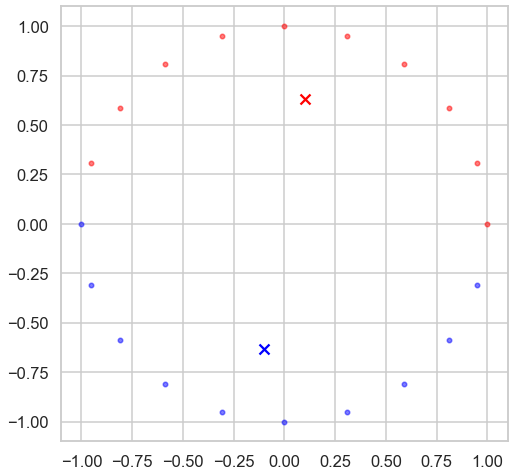

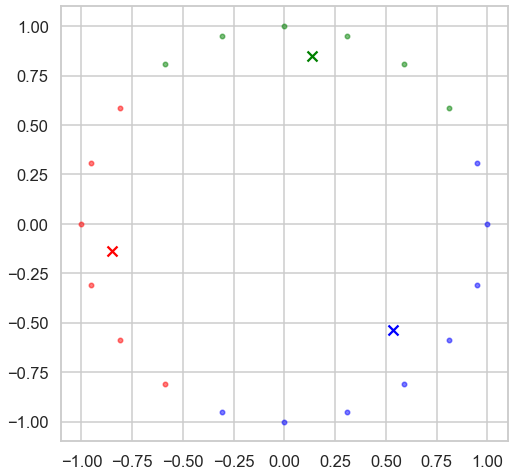

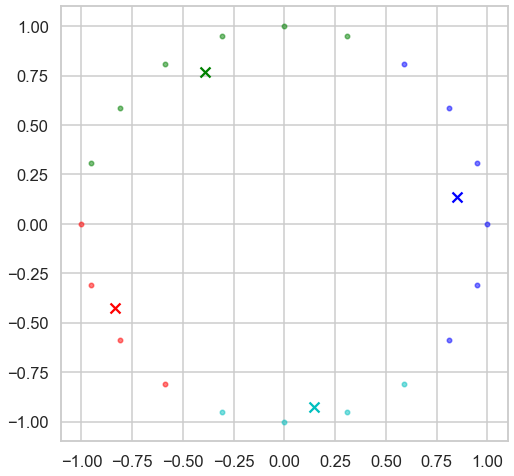

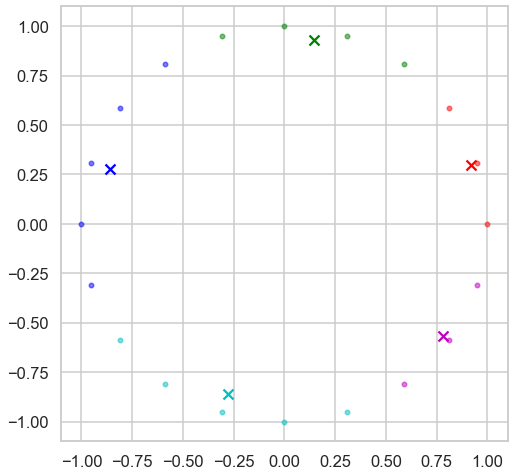

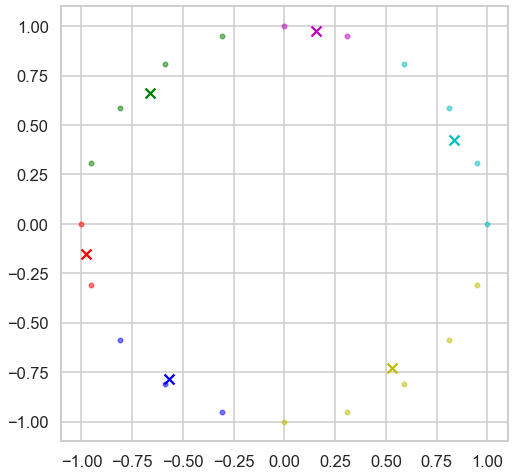

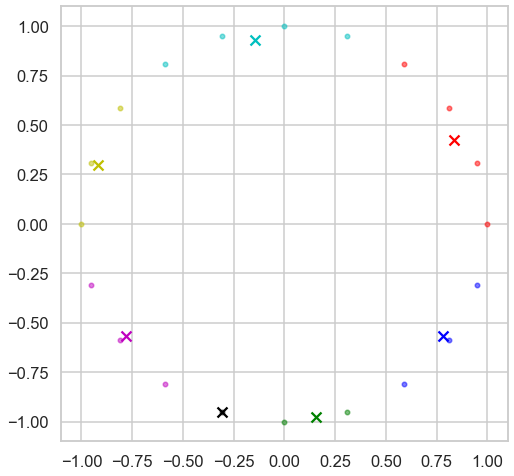

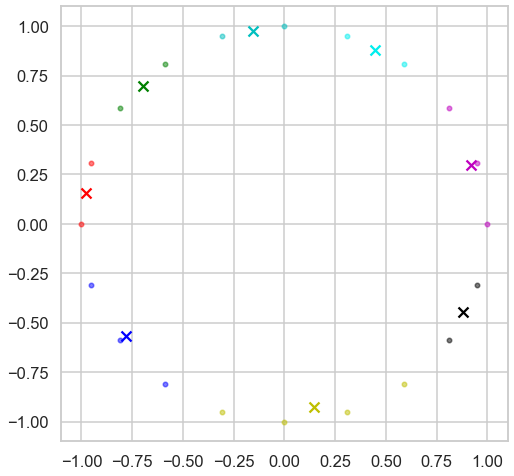

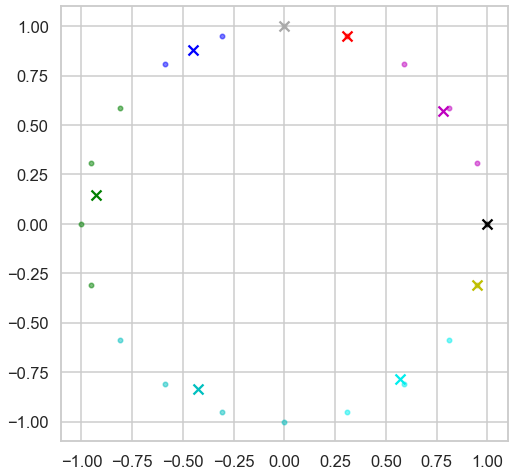

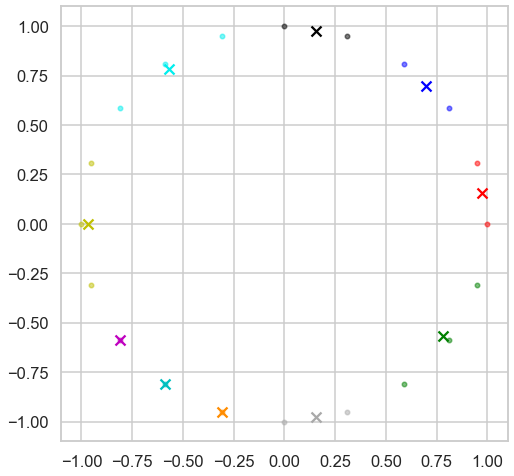

In [6]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
i=2
while i<11:
    [ Updated_Centroids , meansquaredis, clusters, meansqrnew, meansqrold, counte]= GUC_Kmean(X,i,'Eculedian')
    display_cluster(X,np.array(clusters),i,Updated_Centroids)
    plt.show()
    i+=1


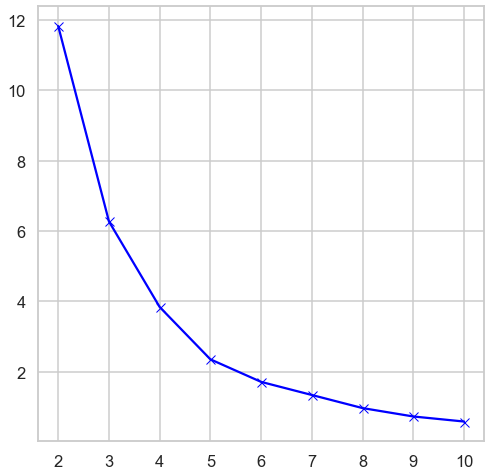

In [7]:
distortion=[]
dis=[]
i=2
while i<11:
    j=0
    while j<100:        
        x=dis.append(GUC_Kmean(X,i,'Eculedian')[3])
        j+=1
    distortion.append(min(dis))    
    i+=1
distortion 
k=range(2,11)
plt.plot(k, distortion, 'bx-')

> #### 2.3. Example 2 : Multi blob Data Gen and display 

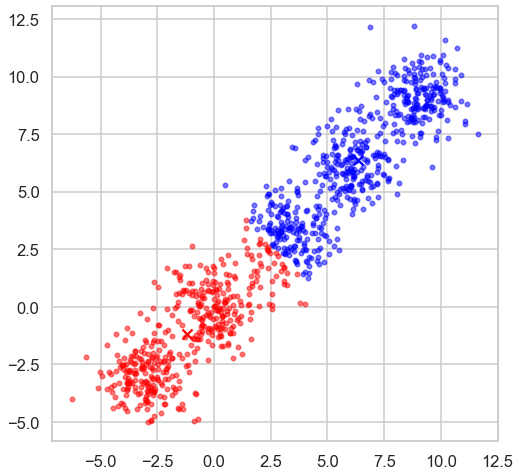

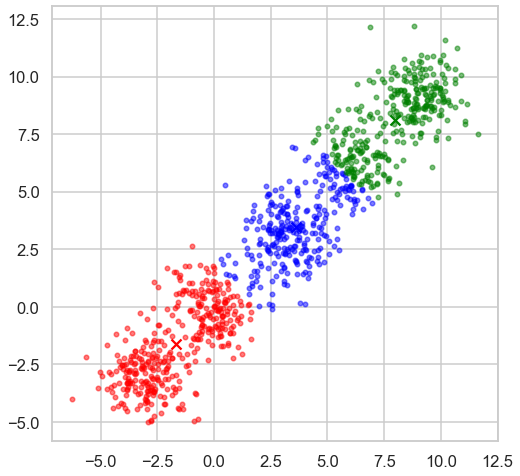

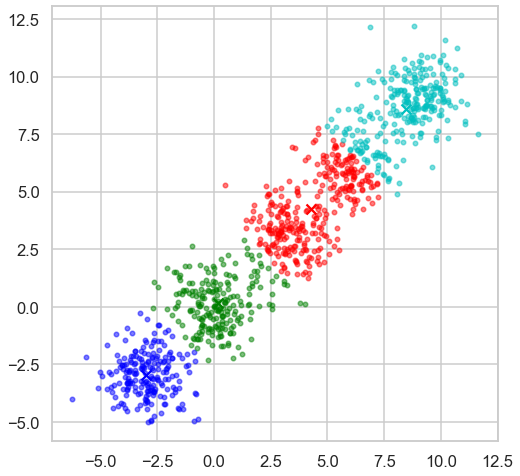

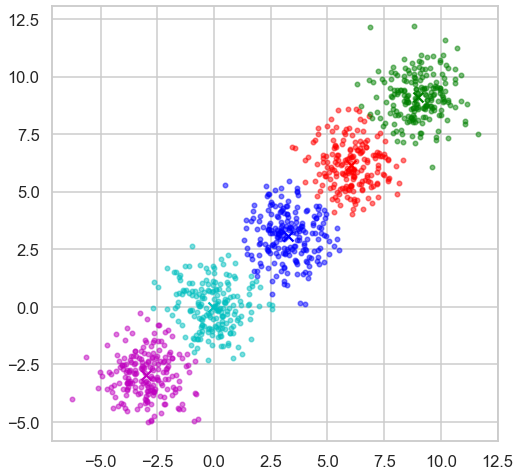

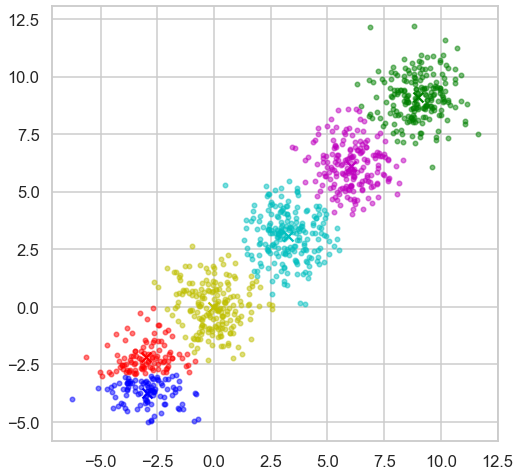

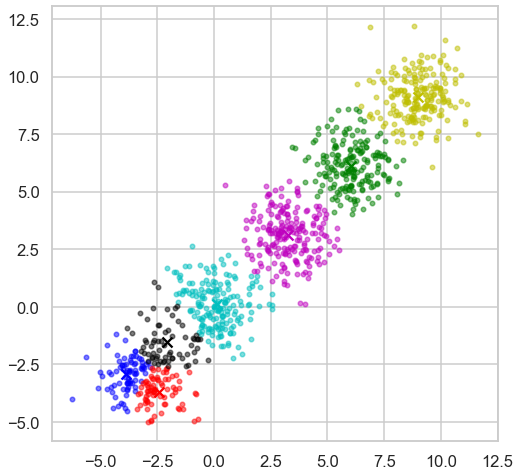

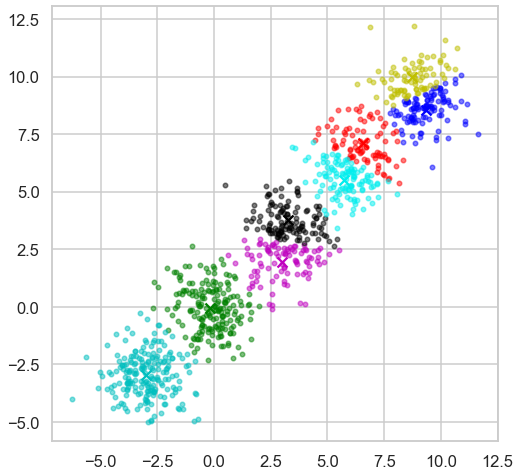

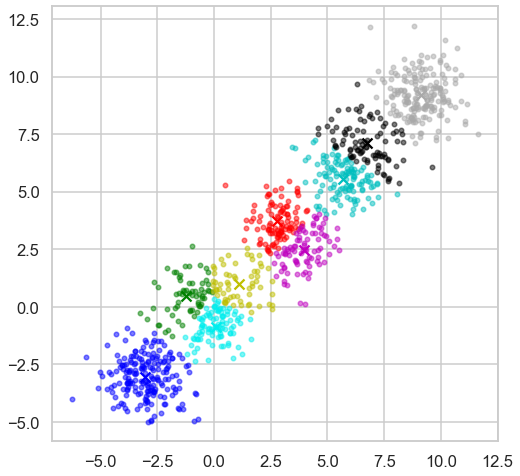

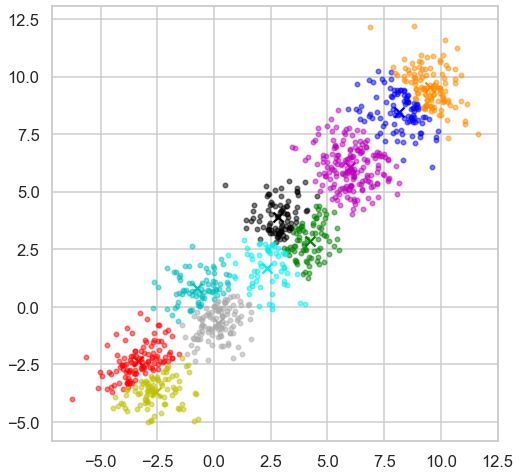

In [8]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
i=2
while i<11:
    [ Updated_Centroids , meansquaredis, clusters, meansqrnew, meansqrold, counte]= GUC_Kmean(X,i,'Eculedian')
#     print(counte)
    display_cluster(X,np.array(clusters),i,Updated_Centroids)
    plt.show()
    i+=1

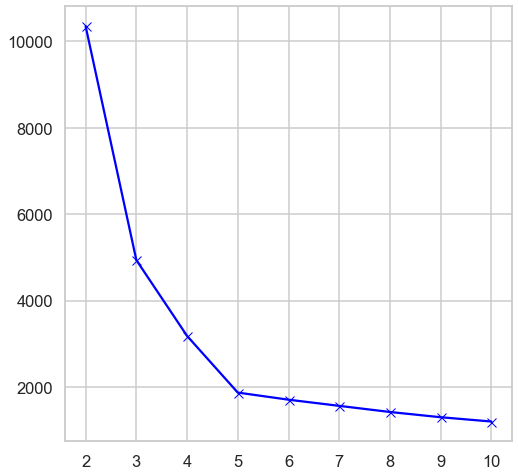

In [9]:
distortion=[]
dis=[]
i=2
while i<11:
    j=0
    while j<50:        
        x=dis.append(GUC_Kmean(X,i,'Eculedian')[3])
        j+=1
    distortion.append(min(dis))    
    i+=1
distortion 
k=range(2,11)
plt.plot(k, distortion, 'bx-')

#### 2.3. Example 3 : moons Data Gen and display 

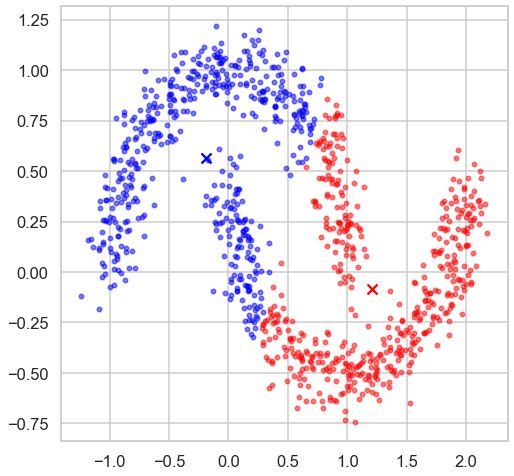

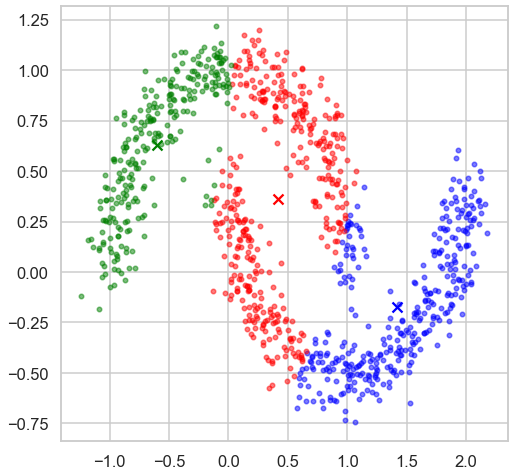

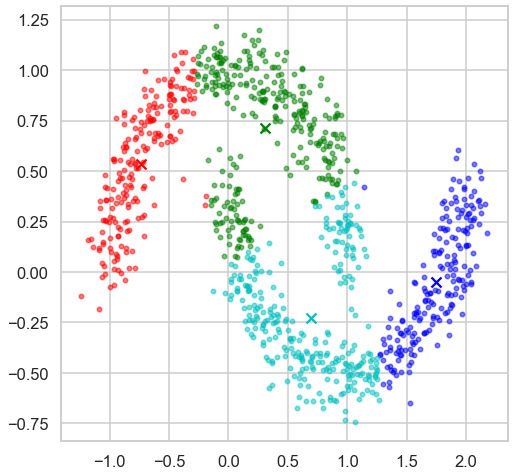

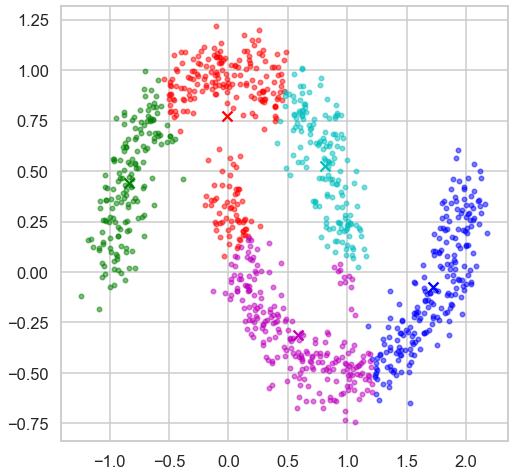

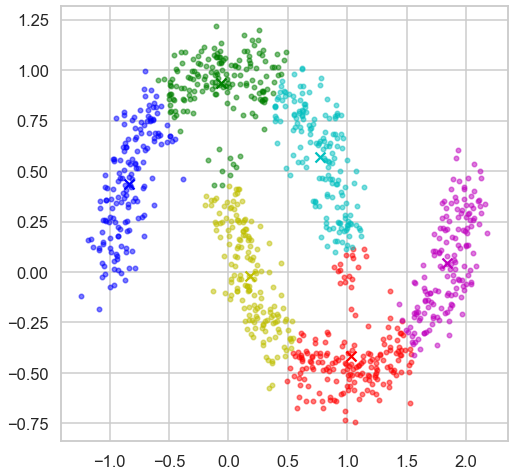

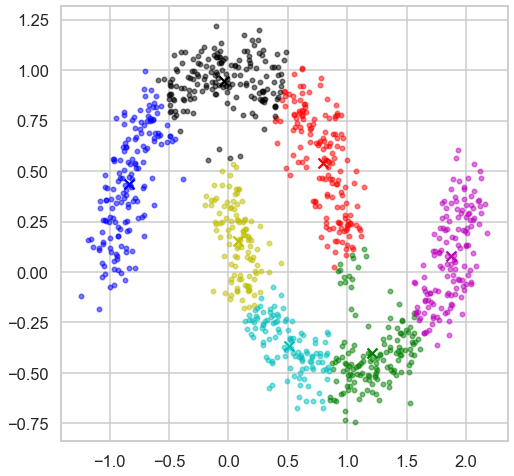

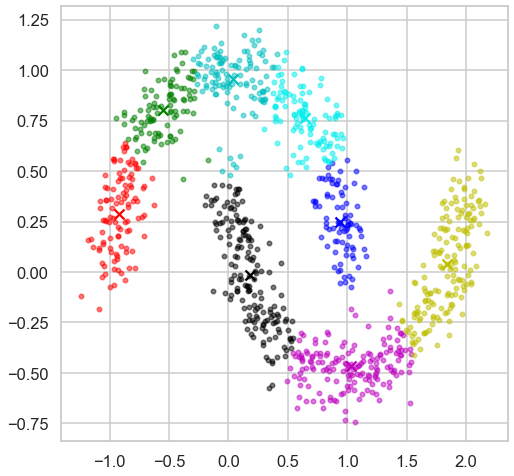

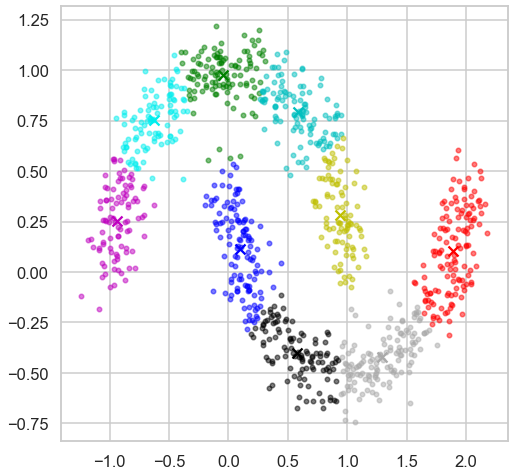

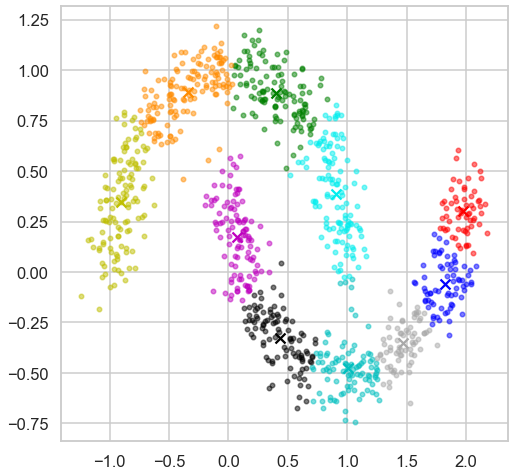

In [10]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
i=2
while i<11:
    [ Updated_Centroids , meansquaredis, clusters, meansqrnew, meansqrold, counte]= GUC_Kmean(X,i,'Eculedian')
#     print(counte)
    display_cluster(X,np.array(clusters),i,Updated_Centroids)
    plt.show()
    i+=1

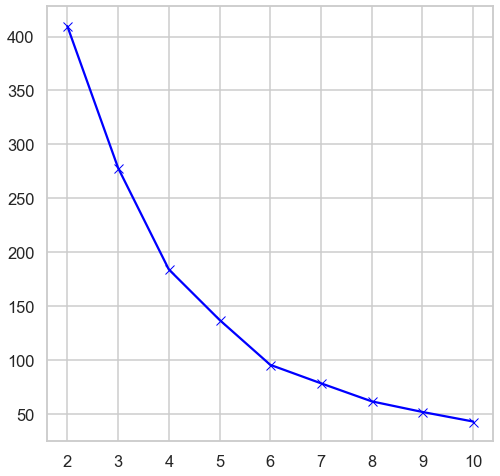

In [11]:
distortion=[]
dis=[]
i=2
while i<11:
    j=0
    while j<50:        
        x=dis.append(GUC_Kmean(X,i,'Eculedian')[3])
        j+=1
    distortion.append(min(dis))    
    i+=1
distortion 
k=range(2,11)
plt.plot(k, distortion, 'bx-')

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [12]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler , RobustScaler , Normalizer

In [13]:
data = pd.read_csv('Customer data.csv')
data.head()
                                       

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [14]:
i=0
X=[]
cols_to_norm = ['Age','Income']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
while i<len(data):    
    arr1=[]
    arr1.append(data.Age[i])
    arr1.append(data.Income[i])
    X.append(arr1)
    i+=1
X=np.array(X)


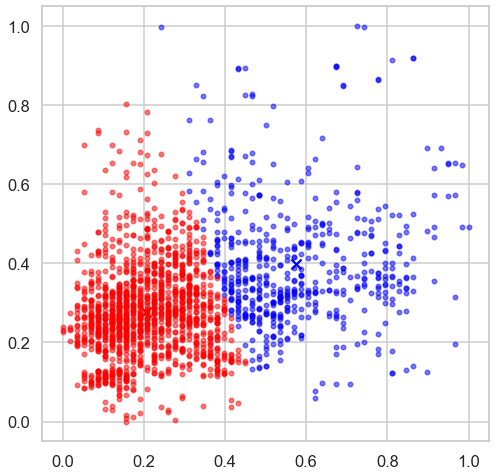

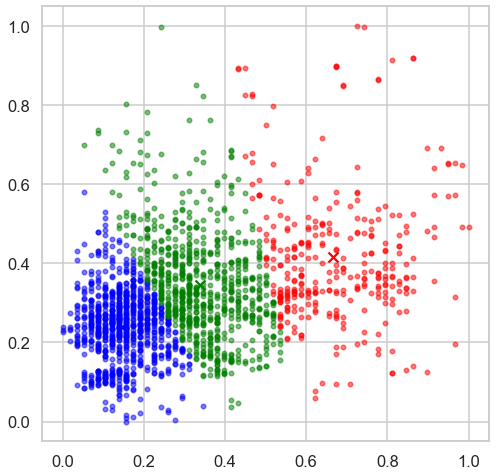

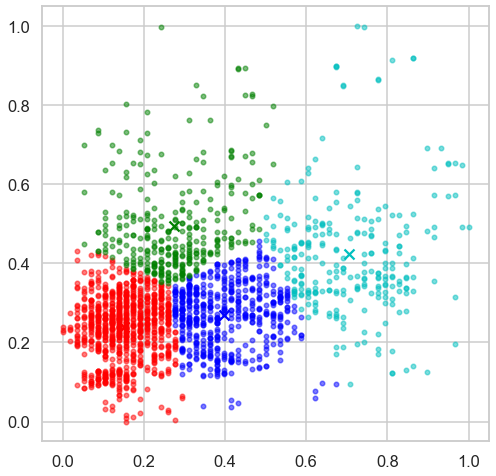

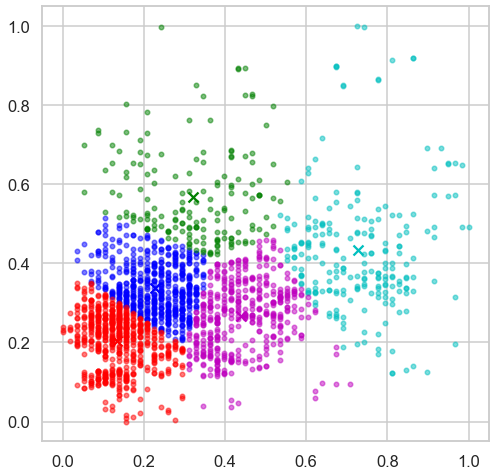

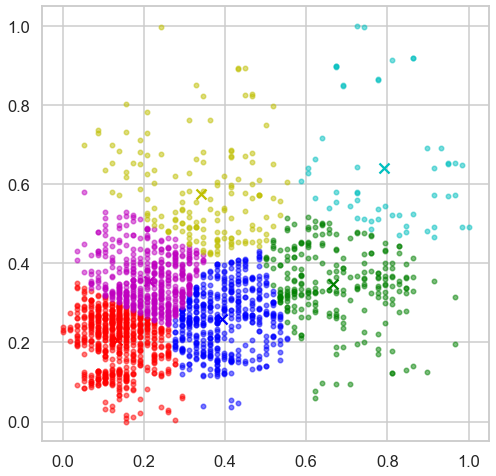

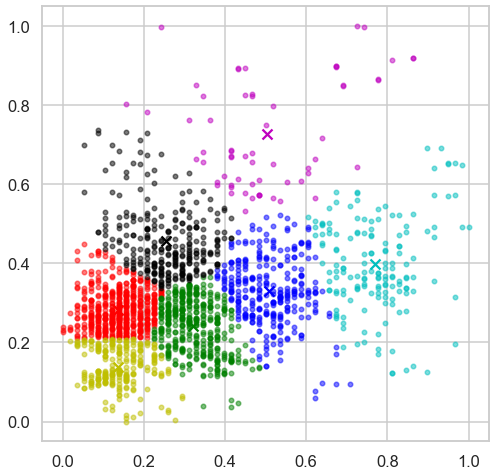

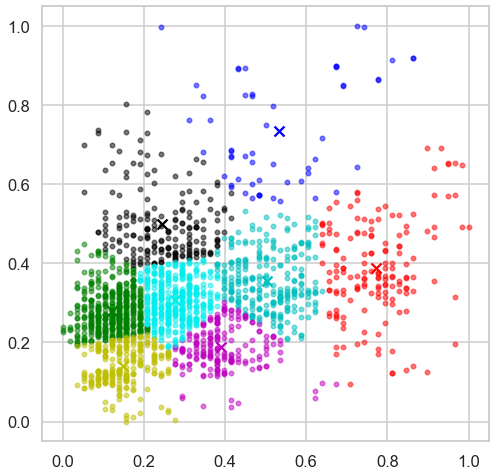

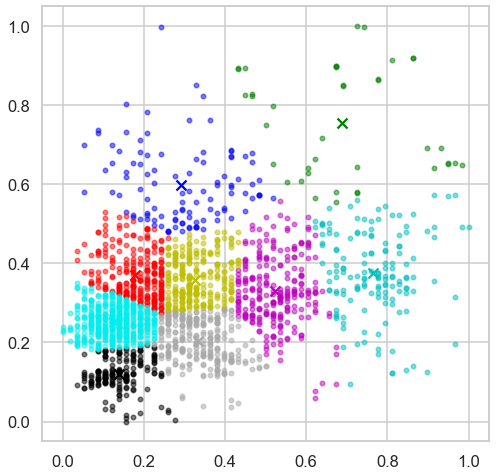

In [15]:
i=2
while i<10:
    [ Updated_Centroids , meansquaredis, clusters, meansqrnew, meansqrold, counte]= GUC_Kmean(X,i,'Eculedian')
    display_cluster(X,np.array(clusters),i,Updated_Centroids)
    plt.show()
    i+=1

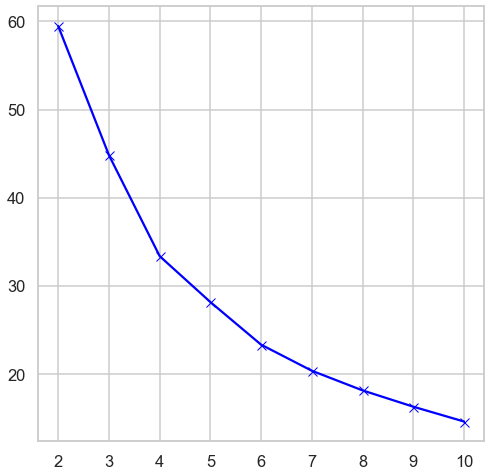

In [18]:
distortion=[]
dis=[]
i=2
while i<11:
    j=0
    while j<50:        
        x=dis.append(GUC_Kmean(X,i,'Eculedian')[3])
        j+=1
    distortion.append(min(dis))    
    i+=1
distortion 
k=range(2,11)
plt.plot(k, distortion, 'bx-')